In [9]:
import pandas as pd
import numpy as np
import io
import os
import time
import json
import sagemaker.amazon.common as smac
import sagemaker
from sagemaker.predictor import csv_serializer, json_deserializer
import glob
import matplotlib.pyplot as plt


## SKIP THIS SECTION

In [2]:

#!conda install -y s3fs

import boto3
import s3fs
import sagemaker
from sagemaker import get_execution_role

##The S3 bucket and prefix that you want to use for training and model data. This should be within the same region as the Notebook Instance, training, and hosting.
#The IAM role arn used to give training and hosting access to your data. See the documentation for how to create these. Here we use the get_execution_role function to obtain the role arn which was specified when creating the notebook.
bucket = 'data'
prefix = 'rnd'

sagemaker_session = sagemaker.Session()
role = get_execution_role()

s3_data_path = "{}/{}/2013-8/".format(bucket, prefix)
s3_output_path = "{}/{}/output".format(bucket, prefix)

ValueError: Must setup local AWS configuration with a region supported by SageMaker.

In [ ]:
#!wget http://gwa.ewi.tudelft.nl/fileadmin/pds/trace-archives/grid-workloads-archive/datasets/gwa-t-12/rnd.zip
#import zipfile
#with zipfile.ZipFile("rnd.zip","r") as zip_ref:
#    zip_ref.extractall("targetdir")

## SKIP- JUST READING IN 3 CSVs FROM EACH MONTH, skip to Next Section

In [5]:
all_files = glob.glob(os.path.join('rnd/2013-7', "1*.csv"))     

df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df   = pd.concat(df_from_each_file)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
all_files = glob.glob(os.path.join('rnd/2013-8', "1*.csv"))     
df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df8   = pd.concat(df_from_each_file)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [7]:
all_files = glob.glob(os.path.join('rnd/2013-9', "1*.csv"))     

df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df9   = pd.concat(df_from_each_file)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
all_files = glob.glob(os.path.join('rnd/2013-7', "1.csv"))     
df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df71   = pd.concat(df_from_each_file)

all_files = glob.glob(os.path.join('rnd/2013-7', "2.csv"))     
df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df72   = pd.concat(df_from_each_file)

all_files = glob.glob(os.path.join('rnd/2013-7', "3.csv"))     
df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df73   = pd.concat(df_from_each_file)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


In [9]:
all_files = glob.glob(os.path.join('rnd/2013-8', "1.csv"))     
df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df81   = pd.concat(df_from_each_file)

all_files = glob.glob(os.path.join('rnd/2013-8', "2.csv"))     
df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df82   = pd.concat(df_from_each_file)

all_files = glob.glob(os.path.join('rnd/2013-8', "3.csv"))     
df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df83   = pd.concat(df_from_each_file)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


In [7]:
all_files = glob.glob(os.path.join('rnd/2013-9', "1.csv"))     
df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df91   = pd.concat(df_from_each_file)

all_files = glob.glob(os.path.join('rnd/2013-9', "2.csv"))     
df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df92   = pd.concat(df_from_each_file)

all_files = glob.glob(os.path.join('rnd/2013-9', "3.csv"))     
df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df93   = pd.concat(df_from_each_file)

NameError: name 'glob' is not defined

In [8]:
newdat = concatenated_df71.append(concatenated_df72)
newerdat = newdat.append(concatenated_df73)
concatenated_df7 = newerdat

NameError: name 'concatenated_df71' is not defined

In [12]:
newdat = concatenated_df81.append(concatenated_df82)
newerdat = newdat.append(concatenated_df83)
concatenated_df8 = newerdat

In [13]:
newdat = concatenated_df91.append(concatenated_df92)
newerdat = newdat.append(concatenated_df93)
concatenated_df9 = newerdat

In [14]:
afinaldat = concatenated_df7.append(concatenated_df8)
finaldat = afinaldat.append(concatenated_df9)
concatenated_df = finaldat

In [15]:
concatenated_df = concatenated_df8

## **START HERE: ONLY READING IN CSVs FROM EACH MONTH (SHOULD HAVE USED A FUNCTION...)

In [16]:
files = glob.glob(os.path.join('rnd/2013-7', "1.csv"))
dfs = [pd.read_csv(fp, sep = ';\t').assign(VM=os.path.basename(fp).split('.')[0]) for fp in files]
df = pd.concat(dfs, ignore_index=True)

files2 = glob.glob(os.path.join('rnd/2013-7', "3.csv"))
dfs2 = [pd.read_csv(fp, sep = ';\t').assign(VM=os.path.basename(fp).split('.')[0]) for fp in files2]
df2 = pd.concat(dfs2, ignore_index=True)

files3 = glob.glob(os.path.join('rnd/2013-9', "1*.csv"))
dfs3 = [pd.read_csv(fp, sep = ';\t').assign(VM=os.path.basename(fp).split('.')[0]) for fp in files3]
df3 = pd.concat(dfs3, ignore_index=True)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


In [17]:
newdat = df.append(df2)
newerdat = newdat.append(df3)
#concatenated_df = newerdat
concaanewdat = concatenated_df.append(concatenated_df8)
newerdat = newdat.append(concatenated_df9)
concatenated_df = df.append(df2)

In [18]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16514 entries, 0 to 8253
Data columns (total 12 columns):
Timestamp [ms]                           16514 non-null int64
CPU cores                                16514 non-null int64
CPU capacity provisioned [MHZ]           16514 non-null float64
CPU usage [MHZ]                          16514 non-null float64
CPU usage [%]                            16514 non-null float64
Memory capacity provisioned [KB]         16514 non-null float64
Memory usage [KB]                        16514 non-null float64
Disk read throughput [KB/s]              16514 non-null float64
Disk write throughput [KB/s]             16514 non-null float64
Network received throughput [KB/s]       16514 non-null float64
Network transmitted throughput [KB/s]    16514 non-null float64
VM                                       16514 non-null object
dtypes: float64(9), int64(2), object(1)
memory usage: 1.6+ MB


In [19]:
'''newdat = concatenated_df.append(concatenated_df8)
newerdat = newdat.append(concatenated_df9)
concatenated_df = newerdat'''

'newdat = concatenated_df.append(concatenated_df8)\nnewerdat = newdat.append(concatenated_df9)\nconcatenated_df = newerdat'

In [20]:
concatenated_df.head()

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],VM
0,1372629804,2,5851.9989,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667,1
1,1372630104,2,5851.9989,29.259995,0.500000,8218624.0,4.585755e+05,0.000000,2.333333,0.200000,1.000000,1
2,1372630404,2,5851.9989,27.309328,0.466667,8218624.0,1.845480e+05,32.066667,4.200000,0.133333,1.066667,1
3,1372630704,2,5851.9989,23.407996,0.400000,8218624.0,7.829227e+04,0.000000,0.866667,0.066667,1.000000,1
4,1372631004,2,5851.9989,19.506663,0.333333,8218624.0,1.677720e+05,0.000000,0.200000,0.133333,1.000000,1


In [21]:
concatenated_df['Timestamp'] = pd.to_datetime(concatenated_df['Timestamp [ms]'], unit = 's', origin = pd.Timestamp('1970-01-01'))
concatenated_df['Timestamp'] = concatenated_df['Timestamp'].dt.round('5min')  

In [22]:
concatenated_df.tail()

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],VM,Timestamp
8249,1375220257,1,2599.999398,25.999994,1.0,702948.0,53125.066667,0.0,4.333333,1.0,1.0,3,2013-07-30 21:40:00
8250,1375220557,1,2599.999398,25.999994,1.0,702948.0,83884.000000,0.0,4.200000,1.0,1.0,3,2013-07-30 21:45:00
8251,1375220857,1,2599.999398,25.999994,1.0,702948.0,64310.133333,0.0,4.333333,1.0,1.0,3,2013-07-30 21:50:00
8252,1375221157,1,2599.999398,25.999994,1.0,702948.0,54523.200000,0.0,4.066667,1.0,1.0,3,2013-07-30 21:55:00
8253,1375221457,1,2599.999398,25.999994,1.0,702948.0,54523.200000,0.0,4.400000,1.0,1.0,3,2013-07-30 22:00:00


In [23]:
#concatenated_df['Timestamp'] = pd.to_datetime(concatenated_df['Timestamp [ms]'], unit = 'ms', origin = pd.Timestamp('2013-07-01'))
#concatenated_df['Timestamp'] = pd.to_datetime(concatenated_df['Timestamp [ms]'], unit = 'ms', origin=pd.Timestamp('1970-01-01'))

concatenated_df.set_index('Timestamp',inplace=True)

In [24]:
concatenated_df.head()

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],VM
Timestamp,,,,,,,,,,,,
2013-06-30 22:05:00,1372629804,2,5851.9989,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667,1
2013-06-30 22:10:00,1372630104,2,5851.9989,29.259995,0.500000,8218624.0,4.585755e+05,0.000000,2.333333,0.200000,1.000000,1
2013-06-30 22:15:00,1372630404,2,5851.9989,27.309328,0.466667,8218624.0,1.845480e+05,32.066667,4.200000,0.133333,1.066667,1
2013-06-30 22:20:00,1372630704,2,5851.9989,23.407996,0.400000,8218624.0,7.829227e+04,0.000000,0.866667,0.066667,1.000000,1
2013-06-30 22:25:00,1372631004,2,5851.9989,19.506663,0.333333,8218624.0,1.677720e+05,0.000000,0.200000,0.133333,1.000000,1


In [25]:
# check what we have

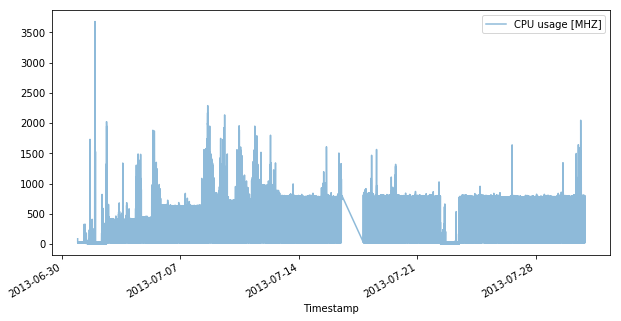

In [26]:
cpu = concatenated_df[['CPU usage [MHZ]']]
cpu.plot(alpha=0.5, style='-', figsize=(10, 5))
plt.legend(loc='upper right');
#cpu.resample('H').sum().plot(style=':', figsize=(10, 5))
#cpu.asfreq('H').plot(style='--');
plt.legend(loc='upper right');

In [27]:
hourlydat = concatenated_df.resample('10min').sum()

In [28]:
hourlydat["start"] = hourlydat.index
hourlydat['target'] = hourlydat['CPU usage [MHZ]']
jsondat=pd.DataFrame(hourlydat['start'])
jsondat['start'] = hourlydat.index
result = pd.concat([hourlydat['start'], hourlydat['target']], axis=1)
result = result.reset_index()
result.drop('Timestamp', axis=1, inplace=True)
#result.start = result.start.astype(str)
#result.set_index('start',inplace=True)
#result

result.set_index('start',inplace=True)
result.index = pd.to_datetime(result.index) 


In [29]:
start = result.index.min()
end = result.index.max()
index = pd.date_range(start, end, freq='H')
index = index.map(lambda t: t.strftime('%Y-%m-%d %H'))
makingjson = pd.DataFrame(index=index, columns=['target'])
makingjson.index.name = 'date'

for day in index:
    makingjson.loc[day, 'target'] = result.loc[day, 'target'].tolist()


In [30]:
def series_to_obj(ts, cat=None):
    obj = {"start": str(ts.index[0]), "target": list(ts)}
    if cat is not None:
        obj["cat"] = cat
    return obj

def series_to_jsonline(ts, cat=None):
    return json.dumps(series_to_obj(ts, cat))

In [31]:
makingjson = makingjson.reset_index(drop=False)
makingjson.columns = ['start', 'target']
makingjson.head()

,start,target
0,2013-06-30 22,"[113.77997748, 106.835977728, 94.91464656, 110..."
1,2013-06-30 23,"[110.51997696000001, 104.66797806, 110.5199769..."
2,2013-07-01 00,"[110.51997696000001, 110.51997696000001, 110.5..."
3,2013-07-01 01,"[108.56931066, 101.635978932, 110.519976960000..."
4,2013-07-01 02,"[110.51997696000001, 110.51997696000001, 110.5..."


In [32]:
len(makingjson)*.2

144.20000000000002

In [5]:
concatenated_df["start"] = concatenated_df.index


NameError: name 'concatenated_df' is not defined

In [6]:
concatenated_df.index

NameError: name 'concatenated_df' is not defined

In [548]:
t0  = '2013-06-30 22:05:00'
data_length = 2692928
num_ts = 90
period = 24
freq= "5min"

In [549]:
index = pd.DatetimeIndex(start=t0, freq=freq, periods=data_length)
index
data = result['target']
index

DatetimeIndex(['2013-06-30 22:05:00', '2013-06-30 22:10:00',
               '2013-06-30 22:15:00', '2013-06-30 22:20:00',
               '2013-06-30 22:25:00', '2013-06-30 22:30:00',
               '2013-06-30 22:35:00', '2013-06-30 22:40:00',
               '2013-06-30 22:45:00', '2013-06-30 22:50:00',
               ...
               '2039-02-05 07:55:00', '2039-02-05 08:00:00',
               '2039-02-05 08:05:00', '2039-02-05 08:10:00',
               '2039-02-05 08:15:00', '2039-02-05 08:20:00',
               '2039-02-05 08:25:00', '2039-02-05 08:30:00',
               '2039-02-05 08:35:00', '2039-02-05 08:40:00'],
              dtype='datetime64[ns]', length=2692928, freq='5T')

In [550]:
freq = 'H'
prediction_length = 48
context_length = 24

In [551]:
time_series = []
time_series.append(pd.Series(data=data, index=index))

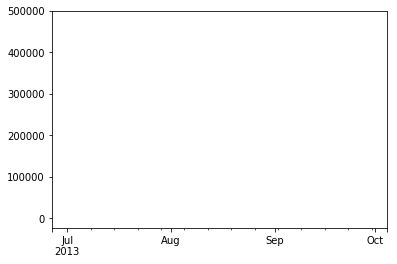

In [552]:
time_series[0].plot()
plt.show()

In [ ]:
AO = Series(ao[:,2], index=dates)


In [579]:
concatenated_df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],VM,target
Timestamp,,,,,,,,,,,,,
2013-06-30 22:05:00,1372629804,2,5851.998900,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667,1,87.779984
2013-06-30 22:10:00,1372630104,2,5851.998900,29.259995,0.500000,8218624.0,4.585755e+05,0.000000,2.333333,0.200000,1.000000,1,29.259995
2013-06-30 22:15:00,1372630404,2,5851.998900,27.309328,0.466667,8218624.0,1.845480e+05,32.066667,4.200000,0.133333,1.066667,1,27.309328
2013-06-30 22:20:00,1372630704,2,5851.998900,23.407996,0.400000,8218624.0,7.829227e+04,0.000000,0.866667,0.066667,1.000000,1,23.407996
2013-06-30 22:25:00,1372631004,2,5851.998900,19.506663,0.333333,8218624.0,1.677720e+05,0.000000,0.200000,0.133333,1.000000,1,19.506663
2013-06-30 22:30:00,1372631304,2,5851.998900,29.259995,0.500000,8218624.0,3.914613e+04,0.000000,0.266667,0.200000,1.000000,1,29.259995
2013-06-30 22:35:00,1372631604,2,5851.998900,29.259995,0.500000,8218624.0,1.733632e+05,0.000000,0.400000,0.200000,1.000000,1,29.259995
2013-06-30 22:40:00,1372631904,2,5851.998900,29.259995,0.500000,8218624.0,9.506880e+04,0.000000,0.200000,0.533333,1.000000,1,29.259995
2013-06-30 22:45:00,1372632204,2,5851.998900,29.259995,0.500000,8218624.0,1.454019e+05,0.000000,0.200000,0.333333,1.000000,1,29.259995


In [594]:


concatenated_df["start"] = concatenated_df.index
concatenated_df['target'] = concatenated_df['CPU usage [MHZ]']
jsondat=pd.DataFrame(concatenated_df['start'])
jsondat['start'] = concatenated_df.index
result = pd.concat([concatenated_df['start'], concatenated_df['target']], axis=1)
result = result.reset_index()
result.drop('Timestamp', axis=1, inplace=True)
#result.start = result.start.astype(str)
#result.set_index('start',inplace=True)
#result

result.set_index('start',inplace=True)
result.index = pd.to_datetime(result.index) 


In [595]:
result

,target
start,
2013-06-30 22:05:00,87.779984
2013-06-30 22:10:00,29.259995
2013-06-30 22:15:00,27.309328
2013-06-30 22:20:00,23.407996
2013-06-30 22:25:00,19.506663
2013-06-30 22:30:00,29.259995
2013-06-30 22:35:00,29.259995
2013-06-30 22:40:00,29.259995
2013-06-30 22:45:00,29.259995


In [3]:
result.tail()

NameError: name 'result' is not defined

In [4]:

result = pd.concat([concatenated_df['VM'],concatenated_df['start'], concatenated_df['target']], axis=1)
result = result.reset_index()
#result.set_index('start',inplace=True)

result.set_index(['start', 'VM'],inplace=True)
result.drop('Timestamp', axis=1, inplace=True)


NameError: name 'pd' is not defined

In [619]:
df = concatenated_df.groupby('VM').resample('5min', how={'target':np.mean})

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:1324: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  return get_resampler_for_grouping(self, rule, *args, **kwargs)


In [2]:
df

NameError: name 'df' is not defined

In [621]:
df.reset_index(level=0, inplace=True)


In [623]:
df.reset_index(level=0, inplace=True)


In [639]:
df['Timestamp'] = df['Timestamp'].dt.strftime('%m/%d/%Y %H:%M%:%S')

AttributeError: Can only use .dt accessor with datetimelike values

In [1]:
df

NameError: name 'df' is not defined

In [612]:
import json
import math
from os import path
import pandas as pd

In [625]:
cpu_use_df = pd.read_csv('dftoformat.csv')
cpu_use_df.tail()

,VM,Timestamp,target
17275,3,2013-07-30 21:40:00,25.999994
17276,3,2013-07-30 21:45:00,25.999994
17277,3,2013-07-30 21:50:00,25.999994
17278,3,2013-07-30 21:55:00,25.999994
17279,3,2013-07-30 22:00:00,25.999994


In [641]:
cpu_use_timeseries = []
vm_index_range = df['VM'].unique()
for vm in vm_index_range:
    vm_series = df[df['VM'] == vm]
    
    # some data is invalid and thus needs to be set to something 
    # (it could be the previous num for normalization or removed)
    target_list = []
    for num in vm_series['target']:
        if math.isnan(num) == False:
            target_list.append(float(num))
        else:
            target_list.append(0.0)
            
    cpu_use_timeseries.append({
        'start': vm_series['Timestamp'].tolist()[0], # the starting timestamp
        'target': target_list, # these need to be converted to floats for json
         #'cat': vm, if we used categories we could do this
    })

In [642]:
with open('cpu_use_timeseries.json', 'w+') as new_file:
    new_file.write(json.dumps(cpu_use_timeseries))
    

In [643]:
cpu_use_timeseries

[{'start': '06/30/2013 22:05:00',
  'target': [87.7799835,
   29.2599945,
   27.3093282,
   23.4079956,
   19.506663,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   19.506663,
   27.3093282,
   29.2599945,
   29.2599945,
   25.3586619,
   27.3093282,
   29.2599945,
   29.2599945,
   25.3586619,
   11.7039978,
   29.2599945,
   29.2599945,
   25.3586619,
   25.3586619,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   25.3586619,
   21.4573293,
   27.3093282,
   29.2599945,
   29.2599945,
   27.3093282,
   29.2599945,
   27.3093282,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   27.3093282,
   29.2599945,
   23.4079956,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   23.4079956,
   25.3586619,
   27.3093282,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945,
   29.2599945

In [ ]:
df[1:]

In [486]:
df.head()

,VM,target
Timestamp,,
2013-06-30 22:05:00,1,87.779984
2013-06-30 22:10:00,1,29.259995
2013-06-30 22:15:00,1,27.309328
2013-06-30 22:20:00,1,23.407996
2013-06-30 22:25:00,1,19.506663


TypeError: 'NoneType' object is not iterable

In [411]:
start = result.index.min()
end = result.index.max()
index = result.index
index = pd.date_range(start, end, freq = "H")
index = index.map(lambda t: t.strftime('%Y-%m-%d %H'))
makingjson = pd.DataFrame(index=index, columns=['target'])
makingjson.index.name = 'date'

for day in index:
    makingjson.loc[day, 'target'] = result.loc[day, 'target'].tolist()

In [412]:
makingjson

,target
date,
2013-06-30 22,"[87.7799835, 29.2599945, 27.3093282, 23.407995..."
2013-06-30 23,"[29.2599945, 29.2599945, 25.3586619, 27.309328..."
2013-07-01 00,"[29.2599945, 29.2599945, 29.2599945, 29.259994..."
2013-07-01 01,"[27.3093282, 29.2599945, 27.3093282, 29.259994..."
2013-07-01 02,"[29.2599945, 29.2599945, 29.2599945, 29.259994..."
2013-07-01 03,"[29.2599945, 29.2599945, 29.2599945, 29.259994..."
2013-07-01 04,"[25.3586619, 25.3586619, 29.2599945, 29.259994..."
2013-07-01 05,"[25.3586619, 29.2599945, 29.2599945, 29.259994..."
2013-07-01 06,"[29.2599945, 29.2599945, 27.3093282, 27.309328..."


In [422]:
t0  = '2013-07-01 00:00:00'
data_length = 8248
num_ts = 90
period = 24
freq= "H"

index = pd.DatetimeIndex(start=t0, freq=freq, periods=data_length)
index
data = result['target']
index


DatetimeIndex(['2013-07-01 00:00:00', '2013-07-01 01:00:00',
               '2013-07-01 02:00:00', '2013-07-01 03:00:00',
               '2013-07-01 04:00:00', '2013-07-01 05:00:00',
               '2013-07-01 06:00:00', '2013-07-01 07:00:00',
               '2013-07-01 08:00:00', '2013-07-01 09:00:00',
               ...
               '2014-06-09 06:00:00', '2014-06-09 07:00:00',
               '2014-06-09 08:00:00', '2014-06-09 09:00:00',
               '2014-06-09 10:00:00', '2014-06-09 11:00:00',
               '2014-06-09 12:00:00', '2014-06-09 13:00:00',
               '2014-06-09 14:00:00', '2014-06-09 15:00:00'],
              dtype='datetime64[ns]', length=8248, freq='H')

In [425]:
data

start
2013-06-30 22:05:00     87.779984
2013-06-30 22:10:00     29.259995
2013-06-30 22:15:00     27.309328
2013-06-30 22:20:00     23.407996
2013-06-30 22:25:00     19.506663
2013-06-30 22:30:00     29.259995
2013-06-30 22:35:00     29.259995
2013-06-30 22:40:00     29.259995
2013-06-30 22:45:00     29.259995
2013-06-30 22:50:00     19.506663
2013-06-30 22:55:00     27.309328
2013-06-30 23:00:00     29.259995
2013-06-30 23:05:00     29.259995
2013-06-30 23:10:00     25.358662
2013-06-30 23:15:00     27.309328
2013-06-30 23:20:00     29.259995
2013-06-30 23:25:00     29.259995
2013-06-30 23:30:00     25.358662
2013-06-30 23:35:00     11.703998
2013-06-30 23:40:00     29.259995
2013-06-30 23:45:00     29.259995
2013-06-30 23:50:00     25.358662
2013-06-30 23:55:00     25.358662
2013-07-01 00:00:00     29.259995
2013-07-01 00:05:00     29.259995
2013-07-01 00:10:00     29.259995
2013-07-01 00:15:00     29.259995
2013-07-01 00:20:00     29.259995
2013-07-01 00:25:00     29.259995
2013-07-

In [423]:
time_series = []
time_series.append(pd.Series(data=data, index=index))

ValueError: cannot reindex from a duplicate axis

In [424]:
time_series[0]

IndexError: list index out of range

In [596]:
result3= result.groupby(['start'])

In [597]:
result3.tail()

,target
start,
2013-06-30 22:05:00,87.779984
2013-06-30 22:10:00,29.259995
2013-06-30 22:15:00,27.309328
2013-06-30 22:20:00,23.407996
2013-06-30 22:25:00,19.506663
2013-06-30 22:30:00,29.259995
2013-06-30 22:35:00,29.259995
2013-06-30 22:40:00,29.259995
2013-06-30 22:45:00,29.259995


In [391]:
df2=result.groupby(['VM']).apply(lambda tdf: pd.Series(  dict([[vv,tdf[vv].unique().tolist()] for vv in tdf if vv not in ['VM']])  )) 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 1 to 1
Data columns (total 1 columns):
target    1 non-null object
dtypes: object(1)
memory usage: 16.0+ bytes


In [392]:
df2['start']= result.index.min()

In [394]:
index = pd.DatetimeIndex(df2['start'])
index


DatetimeIndex(['2013-06-30 22:05:00'], dtype='datetime64[ns]', name='start', freq=None)

In [395]:
df2.index = df2['start']

In [396]:
df2.drop('start', axis=1, inplace=True)


In [397]:
df2

,target
start,
2013-06-30 22:05:00,"[87.7799835, 29.2599945, 27.3093282, 23.407995..."


In [408]:
time_series = []
time_series.append(pd.Series(data=result.target, index=))
time_series


KeyError: 'start'

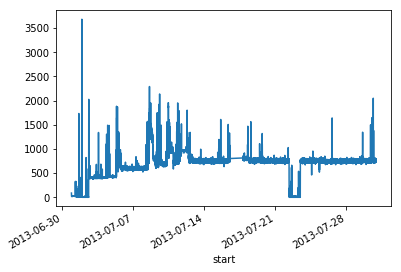

In [404]:
time_series[0].plot()
plt.show()

In [650]:
t0 = '2016-01-01 00:00:00'
data_length = 400
num_ts = 200
period = 24
freq = "H"


In [651]:

time_series = []
for k in range(num_ts):
    level = 10 * np.random.rand()
    seas_amplitude = (0.1 + 0.3*np.random.rand()) * level
    sig = 0.05 * level # noise parameter (constant in time)
    time_ticks = np.array(range(data_length))
    source = level + seas_amplitude*np.sin(time_ticks*(2*np.pi)/period)
    noise = sig*np.random.randn(data_length)
    data = source + noise
    index = pd.DatetimeIndex(start=t0, freq=freq, periods=data_length)
    time_series.append(pd.Series(data=data, index=index))


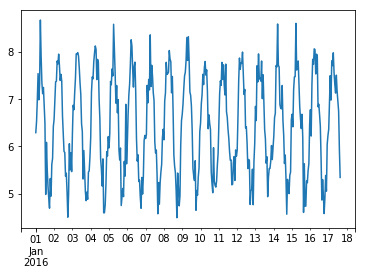

In [659]:
time_series[190].plot()
plt.show()

In [82]:
time_series

[2016-01-01 00:00:00     6.856335
 2016-01-01 01:00:00     7.642022
 2016-01-01 02:00:00     8.485723
 2016-01-01 03:00:00     9.271618
 2016-01-01 04:00:00     9.897312
 2016-01-01 05:00:00     9.473445
 2016-01-01 06:00:00     9.739776
 2016-01-01 07:00:00     9.461549
 2016-01-01 08:00:00     9.530799
 2016-01-01 09:00:00     8.717201
 2016-01-01 10:00:00     8.815086
 2016-01-01 11:00:00     8.086807
 2016-01-01 12:00:00     7.403578
 2016-01-01 13:00:00     6.165821
 2016-01-01 14:00:00     5.990949
 2016-01-01 15:00:00     4.863917
 2016-01-01 16:00:00     4.836768
 2016-01-01 17:00:00     4.871210
 2016-01-01 18:00:00     4.301406
 2016-01-01 19:00:00     4.935953
 2016-01-01 20:00:00     5.315238
 2016-01-01 21:00:00     5.322248
 2016-01-01 22:00:00     6.423774
 2016-01-01 23:00:00     6.474345
 2016-01-02 00:00:00     7.154556
 2016-01-02 01:00:00     8.139037
 2016-01-02 02:00:00     8.632397
 2016-01-02 03:00:00     9.095086
 2016-01-02 04:00:00     9.556307
 2016-01-02 05

In [ ]:
def series_to_obj(ts, cat=None):
    obj = {"start": str(ts.index[0]), "target": list(ts)}
    if cat is not None:
        obj["cat"] = cat
    return obj

def series_to_jsonline(ts, cat=None):
    return json.dumps(series_to_obj(ts, cat))
encoding = "utf-8"
#s3filesystem = s3fs.S3FileSystem()

with s3filesystem.open(s3_data_path + "/train/train.json", 'wb') as fp:
    for ts in time_series_training:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

with s3filesystem.open(s3_data_path + "/test/test.json", 'wb') as fp:
    for ts in time_series:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

In [28]:
data.loc['VM','start' 'target'].tolist()

KeyError: 'the label [VM] is not in the [index]'

In [39]:
result.index.min()

Timestamp('2013-06-30 22:05:00')

In [1736]:
start = result.index.min()
end = result.index.max()
index = result.index
index = pd.date_range(start, end)
index = index.map(lambda t: t.strftime('%Y-%m-%d %H:%M'))
makingjson = pd.DataFrame(index=index, columns=['target'])
makingjson.index.name = 'date'

for day in index:
    makingjson.loc[day, 'target'] = result.loc[day, 'target'].tolist()

TypeError: Cannot convert input [('1', Timestamp('2013-06-30 22:05:00', freq='5T'))] of type <class 'tuple'> to Timestamp

In [1600]:
time_series = []
for k in list(range(399)):
    data = result.target[result["VM"] == k]
    index = pd.DatetimeIndex(start=t0, freq="T", periods=data_length)
    time_series.append(pd.Series(data=data, index=index))

KeyError: 'VM'

In [1701]:
result.target[result.index['VM'] == 1]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices